# 데이터 가져오기

In [31]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
test = pd.read_csv("~/data/data/bike-sharing-demand/test.csv")

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
test.shape, train.shape

((6493, 9), (10886, 12))

In [33]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성

In [34]:
#datetime을 datetime자료형으로 변겅
train['datetime'] = pd.to_datetime(train['datetime'])

#년도 월 일 시간으로 분리
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

#datetime을 datetime자료형으로 변겅
test['datetime'] = pd.to_datetime(test['datetime'])

#년도 월 일 시간으로 분리
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# year, month, day, hour, minute, second 데이터 개수 시각화

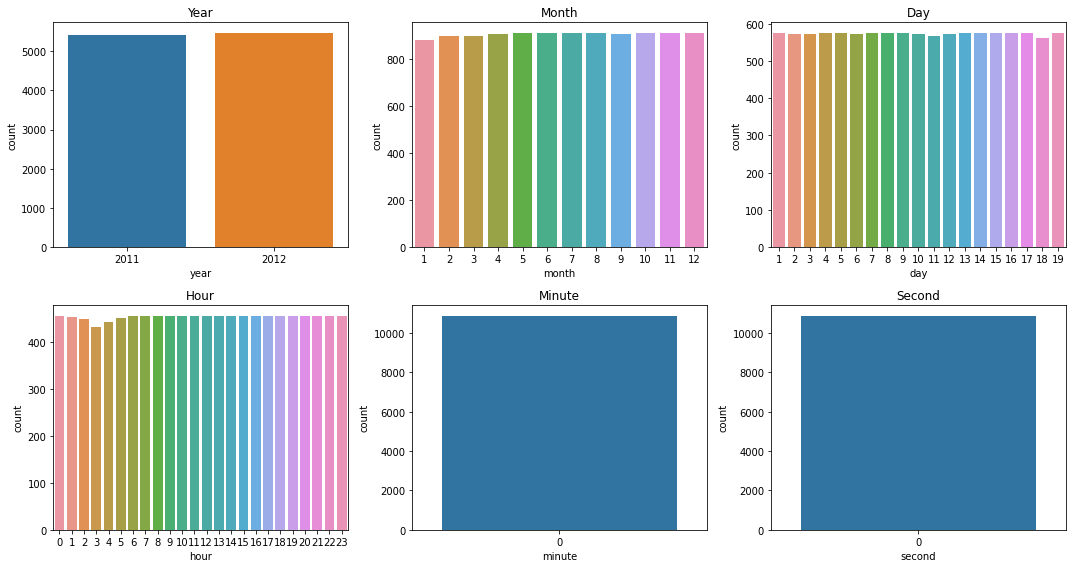

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # subplot 크기 조절 (선택 사항)

# 각 subplot에 countplot을 그릴 열 이름 리스트
columns_to_plot = ['year', 'month', 'day', 'hour', 'minute', 'second']

# 각 subplot에 countplot 그리기
for i, column in enumerate(columns_to_plot):
    row = i // 3  
    col = i % 3   
    sns.countplot(x=column, data=train, ax=axes[row, col])  # 올바른 subplot에 그래프 그리기
    axes[row, col].set_title(column.capitalize())  # 제목 설정

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

# X, y 컬럼 선택 및 train/test 데이터 분리

### minute, second, datetime features 삭제
Minute, Second feature에 데이터가 없으므로 삭제

In [36]:
train.drop(columns =['datetime','second','minute'], axis = 1, inplace=True)
test.drop(columns =['datetime'], axis = 1, inplace=True)

### Test data set에 없는 데이터 삭제
casual	registered 데이터는 test시에 필요 없으므로 삭제

In [37]:
train = train.drop(['casual', 'registered'], axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


### 데이터 분리

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    train.drop('count',axis=1),
    train['count'],
    test_size=0.3,
    random_state = 1004)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7620, 12), (3266, 12), (7620,), (3266,))

In [40]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
10256,4,1,0,1,21.32,25.000,72,8.9981,2012,11,12,18
4201,4,0,1,1,17.22,21.210,88,0.0000,2011,10,7,2
184,1,0,0,1,4.10,3.030,39,30.0026,2011,1,8,23
2584,2,0,1,1,30.34,32.575,28,0.0000,2011,6,15,14
1458,2,0,1,1,21.32,25.000,32,22.0028,2011,4,6,15


# LinearRegression 모델 학습

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

 # 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [46]:
# 학습된 모델을 사용하여 예측
pred= model.predict(X_test)


mse = mean_squared_error(y_test, pred)
print("mse:", mse)
print("rmse:",mse**0.5)

mse: 19514.733806701945
rmse: 139.69514596685866


# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기



<AxesSubplot:xlabel='humidity', ylabel='count'>

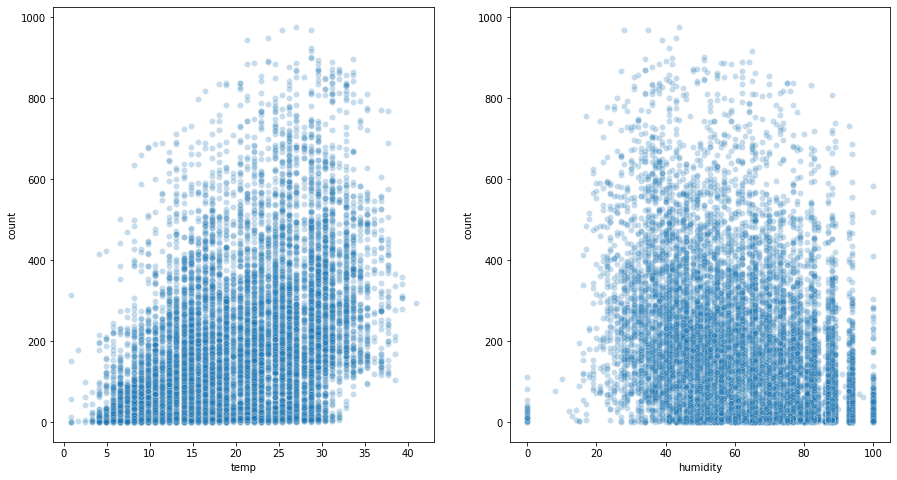

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 8))  # subplot 크기 조절 (선택 사항)
sns.scatterplot(x='temp', y='count',data = train,ax=axes[0],alpha= 0.25)
sns.scatterplot(x='humidity', y='count',data = train,ax=axes[1],alpha= 0.25)
